## Part 1 - Binary Classification Problem

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Preparing the data

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.

    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Network architecture

In [3]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Data splitting - train, test, validation

In [4]:
from sklearn.model_selection import train_test_split

# 'val_test_split' according to suggestion
x_val, x_test, y_val, y_test = train_test_split(
    x_test,
    y_test,
    test_size=0.6,
    random_state=42
)

### Fitting the model

In [5]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8219 - loss: 0.4587 - val_accuracy: 0.8754 - val_loss: 0.3443
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9045 - loss: 0.2728 - val_accuracy: 0.8859 - val_loss: 0.2915
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9227 - loss: 0.2155 - val_accuracy: 0.8869 - val_loss: 0.2837
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9347 - loss: 0.1842 - val_accuracy: 0.8840 - val_loss: 0.2929
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9423 - loss: 0.1634 - val_accuracy: 0.8808 - val_loss: 0.3045
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9494 - loss: 0.1443 - val_accuracy: 0.8784 - val_loss: 0.3189
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9549 - loss: 0.1316 - val_accuracy: 0.8740 - val_loss: 0.3445
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9595 - loss: 0.1196 - val_accuracy: 0.8657 - v

In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Plot training & validation loss

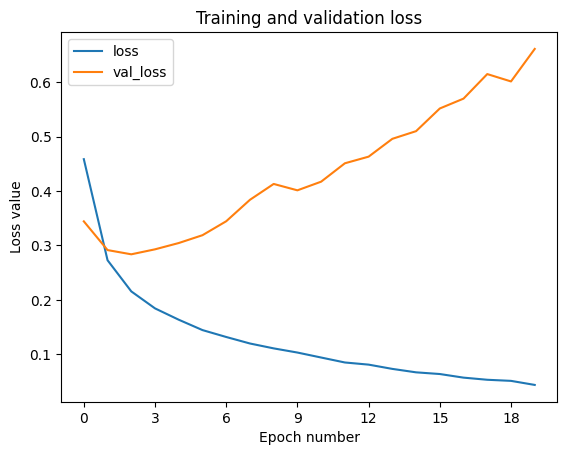

In [7]:
import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label='loss')
plt.plot(history_dict['val_loss'], label='val_loss')

plt.title('Training and validation loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss value')
plt.xticks([3*i for i in range(7)])
plt.legend()
plt.show()

### Plot training & validation accuracy

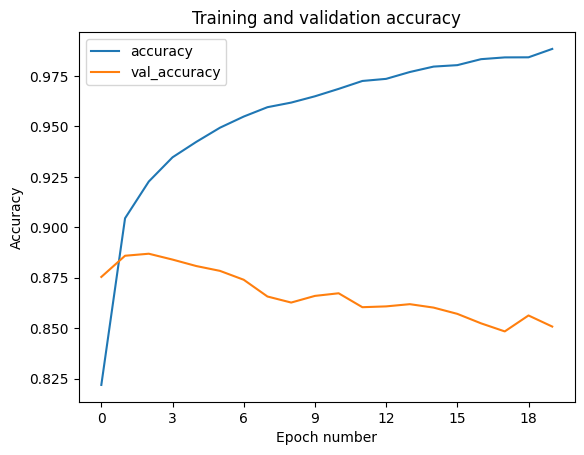

In [8]:
plt.plot(history_dict['accuracy'], label='accuracy')
plt.plot(history_dict['val_accuracy'], label='val_accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xticks([3*i for i in range(7)])
plt.legend()
plt.show()

### Model evaluation

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('test_loss:', test_loss)
print('test_acc:', test_acc)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8532 - loss: 0.6232
test_loss: 0.623165488243103
test_acc: 0.8532000184059143


## Part 2 - Hyperparameters

In [10]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.925:
            print("\nReached 92.5% accuracy so cancelling training!")
            self.model.stop_training = True

### Using callbacks

In [11]:
# 'Resetting' the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = myCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8677 - loss: 0.3268
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9179 - loss: 0.2134
Epoch 3/10
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.1727
Reached 92.5% accuracy so cancelling training!
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9301 - loss: 0.1817


### Grid search optimization

In [12]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
# alternatively from keras.wrappers.scikit_learn import KerasClassifier
# in Google Colab you may need to use !pip install scikeras
# in a block before for it to work properly.

def create_model():
    network = models.Sequential()

    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))

    network.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return network

model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]
param_grid = dict(batch_size=par1_batch, epochs=par2_epoch)

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3
)

grid_results = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8613 - loss: 0.3431
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9221 - loss: 0.2063
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.1640
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8619 - loss: 0.3463
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9253 - loss: 0.2042
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9425 - loss: 0.1612
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8515 - loss: 0.3595
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9189 - loss: 0.2102
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9402 - loss: 0.1643
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8630 - loss: 0.3418
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9226 - loss: 0.2049
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9392 - loss: 0.1611
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1306
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1066
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8606 - loss: 0.3479
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9238 - loss: 0.2035
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9419 - loss: 0.1630
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1363
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.1162
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.3472
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9198 - loss: 0.2081
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9391 - loss: 0.1663
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9512 - loss: 0.1362
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1125
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8548 - loss: 0.3567
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9231 - loss: 0.2033
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9411 - loss: 0.1558
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8574 - loss: 0.3618
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9243 - loss: 0.2030
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9442 - loss: 0.1560
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8502 - loss: 0.3722
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2087
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.1603
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8537 - loss: 0.3569
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9225 - loss: 0.2031
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9417 - loss: 0.1563
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1250
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9636 - loss: 0.0975
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8499 - loss: 0.3810
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9231 - loss: 0.2091
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9438 - loss: 0.1588
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1276
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1009
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8488 - loss: 0.3767
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9209 - loss: 0.2107
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.1626
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.1312
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9623 - loss: 0.1097
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8642 - loss: 0.3383
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9194 - loss: 0.2083
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9360 - loss: 0.1736
Best: 0.883720 using {'batch_size': 64, 'epochs': 3}


### Keras optimization algorithms

In [13]:
def build_model(hp):
    network = models.Sequential()

    network.add(layers.Dense(
        hp.Choice('units', [8, 16, 32]),
        activation='relu',
        input_shape=(10000,)
    ))

    network.add(layers.Dense(hp.Choice('units', [8, 16, 32]), activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))

    network.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return network

In [14]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5
)

tuner.search(
    x_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_val, y_val)
)

best_model = tuner.get_best_models()[0]
best_model

Trial 3 Complete [00h 00m 13s]
val_loss: 0.282941073179245

Best val_loss So Far: 0.282941073179245
Total elapsed time: 00h 00m 41s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>